# 1 Regularized Linear Regression

In the first half of the exercise, you will implement regularized linear regression to predict the amount of water flowing out of a dam using the change of water level in a reservoir. In the next half, you will go through some diagnostics of debugging learning algorithms and examine the effects of bias v.s. variance. The provided script, `ex5.m`, will help you step through this exercise. 

## 1.1 Visualizing the dataset

We will begin by visualizing the dataset containing historical records on the change in the water level, $x$, and the amount of water flowing out of the dam, $y$. This dataset is divided into three parts:

* A **training set** that your model will learn on: $X$, $y$
* A **cross validation set** for determining the regularization parameter: $X_{val}$, $y_{val}$
* A **test set** for evaluating performance. These are "unseen" examples which your model did not see during training: $X_{test}$, $y_{test}$

The next step of `ex5.m` will plot the training data (Figure 1). In the following parts, you will implement linear regression and use that to fit a straight line to the data and plot learning curves. Following that, you will implement polynomial regression to find a better fit to the data.

Loading and Visualizing Data ...


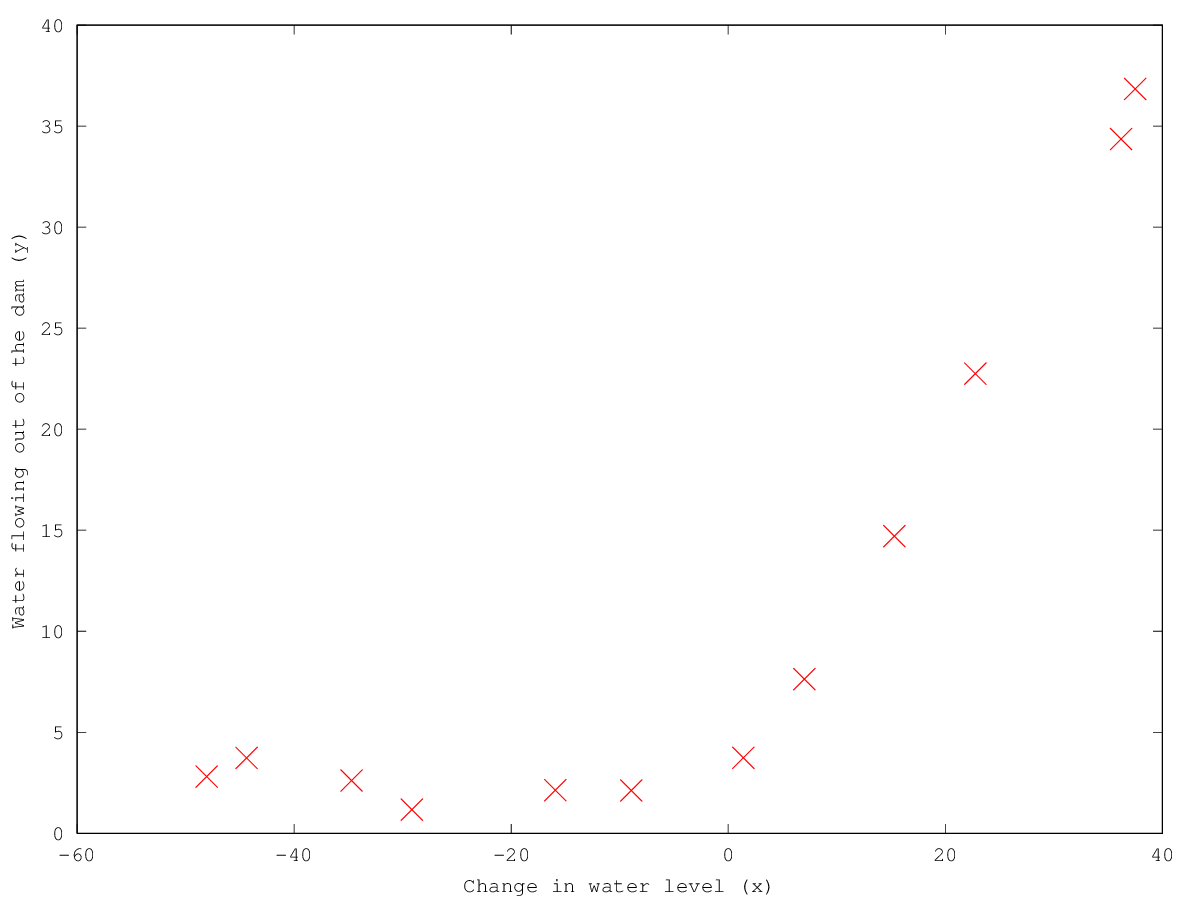

In [1]:
%% =========== Part 1: Loading and Visualizing Data =============
%  We start the exercise by first loading and visualizing the dataset. 
%  The following code will load the dataset into your environment and plot
%  the data.
%

% Load Training Data
fprintf('Loading and Visualizing Data ...\n')

% Load from ex5data1: 
% You will have X, y, Xval, yval, Xtest, ytest in your environment
load ('/home/roger/Workspace/MOOC/Coursera/MLearning/Week 6/Assignment/ex5/ex5data1.mat');

% m = Number of examples
m = size(X, 1);

% Plot training data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');


## 1.2 Regularized linear regression cost function

Recall that regularized linear regression has the following cost function:

$$J(\theta) = \frac{1}{2m} \left ( \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 \right ) + \frac{\lambda}{2m} \left (\sum_{j=1}^{n}\theta_j^2 \right )$$

where $\lambda$ is a regularization parameter which controls the degree of regularization (thus, help preventing overfitting). The regularization term puts a penalty on the overal cost $J$. As the magnitudes of the model parameters $\theta_j$ increase, the penalty increases as well. Note that you should not regularize the $\theta_0$ term. (In Octave/MATLAB, the $\theta_0$ term is represented as `theta(1)` since indexing in Octave/MATLAB starts from 1).

You should now complete the code in the file `linearRegCostFunction.m`. Your task is to write a function to calculate the regularized linear regression cost function. If possible, try to vectorize your code and avoid writing loops. When you are finished, the next part of `ex5.m` will run your cost function using theta initialized at [1; 1]. You should expect to see an output of 303.993.

In [2]:
% Implementation of J
% NOT FINISHED function
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
    %LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    %regression with multiple variables
    %   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    %   cost of using theta as the parameter for linear regression to fit the 
    %   data points in X and y. Returns the cost in J and the gradient in grad

    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    % ====================== YOUR CODE HERE ======================
    % Instructions: Compute the cost and gradient of regularized linear 
    %               regression for a particular choice of theta.
    %
    %               You should set J to the cost and grad to the gradient.
    %
    h = X*theta;
    theta(1) = 0;
    J = (sum((h - y).^2)/(2*m)) + (lambda/(2*m))*(theta'*theta);
    % =========================================================================

    grad = grad(:);
end

In [3]:
%% =========== Part 2: Regularized Linear Regression Cost =============
%  You should now implement the cost function for regularized linear 
%  regression. 
%
theta = [1 ; 1];
J = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Cost at theta = [1 ; 1]: %f '...
         '\n(this value should be about 303.993192)\n'], J);

Cost at theta = [1 ; 1]: 303.993192 
(this value should be about 303.993192)


## 1.3 Regularized linear regression gradient

Correspondingly, the partial derivative of regularized linear regression's cost for $\theta_j$ is defined as

$$\frac{\partial}{\partial\theta_0}J(\theta) = \frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)} \ \ \ \ \ \ \ \text{for} \ \ \ \ j = 0$$

$$\frac{\partial}{\partial\theta_j}J(\theta) = \left (\frac{1}{m} \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}\right ) + \frac{\lambda}{m} \theta_j \ \ \ \ \ \ \ \text{for} \ \ \ \ j \geq 1$$

In `linearRegCostFunction.m`, add code to calculate the gradient, returning it in the variable grad. When you are finished, the next part of `ex5.m` will run your gradient function using theta initialized at [1; 1]. You should expect to see a gradient of [-15.30; 598.250].

In [4]:
function [J, grad] = linearRegCostFunction(X, y, theta, lambda)
    %LINEARREGCOSTFUNCTION Compute cost and gradient for regularized linear 
    %regression with multiple variables
    %   [J, grad] = LINEARREGCOSTFUNCTION(X, y, theta, lambda) computes the 
    %   cost of using theta as the parameter for linear regression to fit the 
    %   data points in X and y. Returns the cost in J and the gradient in grad

    % Initialize some useful values
    m = length(y); % number of training examples

    % You need to return the following variables correctly 
    J = 0;
    grad = zeros(size(theta));

    % ====================== YOUR CODE HERE ======================
    % Instructions: Compute the cost and gradient of regularized linear 
    %               regression for a particular choice of theta.
    %
    %               You should set J to the cost and grad to the gradient.
    %
    h = X*theta;
    theta(1) = 0;
    J = (sum((h - y).^2)/(2*m)) + (lambda/(2*m))*(theta'*theta);
    grad = (((h - y)'*X)./m) + (lambda/m).*theta';
    % =========================================================================

    grad = grad(:);
end

In [5]:
theta = [1 ; 1];
[J, grad] = linearRegCostFunction([ones(m, 1) X], y, theta, 1);

fprintf(['Gradient at theta = [1 ; 1]:  [%f; %f] '...
         '\n(this value should be about [-15.303016; 598.250744])\n'], ...
         grad(1), grad(2));

Gradient at theta = [1 ; 1]:  [-15.303016; 598.250744] 
(this value should be about [-15.303016; 598.250744])


## 1.4 Fitting linear regression

Once your cost function and gradient are working correctly, the next part of `ex5.m` will run the code in `trainLinearReg.m` to compute the optimal values of $\theta$. This training function uses `fmincg` to optimize the cost function.

In this part, we set regularization parameter $\lambda$ to zero. Because our current implementation of linear regression is trying to fit a 2-dimensional $\theta$, regularization will not be incredibly helpful for a $\theta$ of such low dimension. In the later parts of the exercise, you will be using polynomial regression with regularization.

Finally, the `ex5.m` script should also plot the best fit line, resulting in an image similar to Figure 2. The best fit line tells us that the model is not a good fit to the data because the data has a non-linear pattern. While visualizing the best fit as shown is one possible way to debug your learning algorithm, it is not always easy to visualize the data and model. In the next section, you will implement a function to generate learning curves that can help you debug your learning algorithm even if it is not easy to visualize the data.

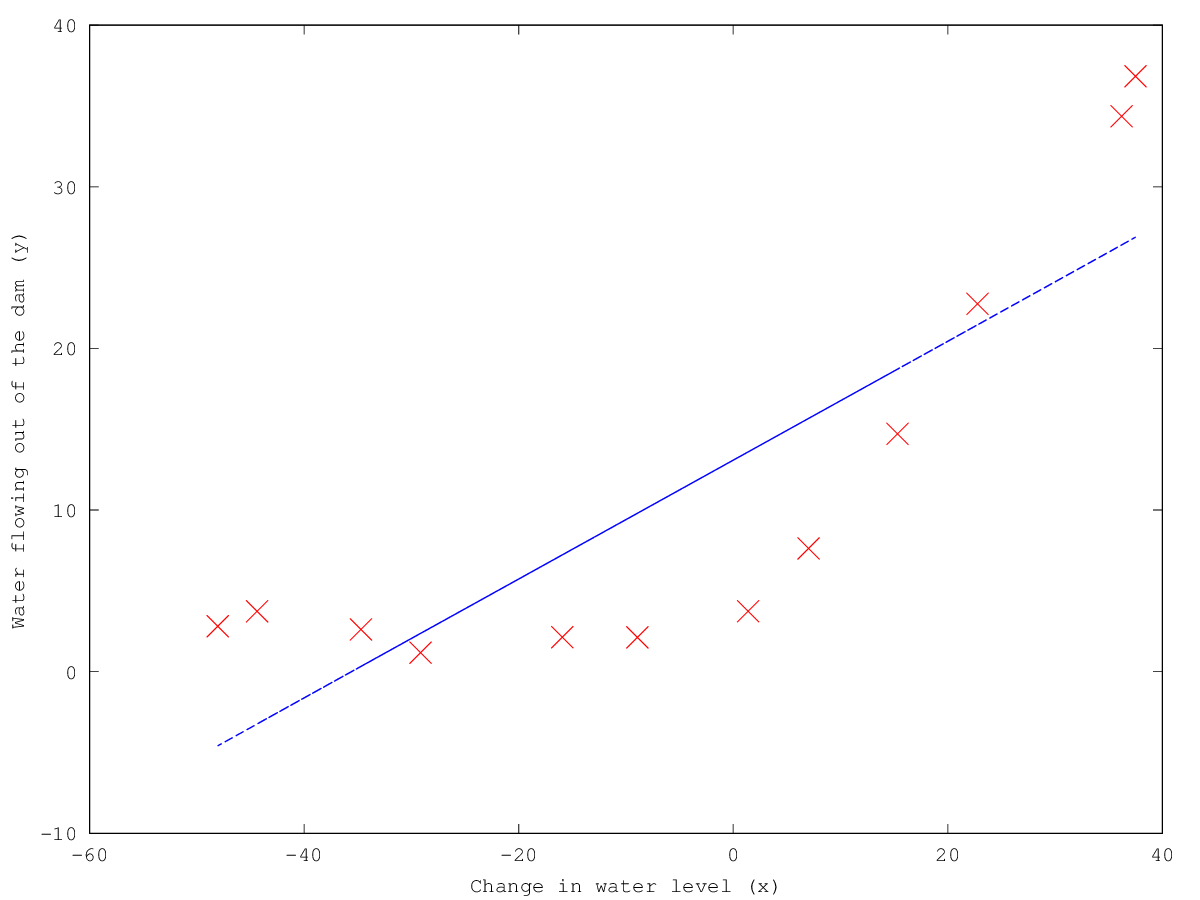

In [6]:
%% =========== Part 4: Train Linear Regression =============
%  Once you have implemented the cost and gradient correctly, the
%  trainLinearReg function will use your cost function to train 
%  regularized linear regression.
% 
%  Write Up Note: The data is non-linear, so this will not give a great 
%                 fit.
%

function [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
    % Minimize a continuous differentialble multivariate function. Starting point
    % is given by "X" (D by 1), and the function named in the string "f", must
    % return a function value and a vector of partial derivatives. The Polack-
    % Ribiere flavour of conjugate gradients is used to compute search directions,
    % and a line search using quadratic and cubic polynomial approximations and the
    % Wolfe-Powell stopping criteria is used together with the slope ratio method
    % for guessing initial step sizes. Additionally a bunch of checks are made to
    % make sure that exploration is taking place and that extrapolation will not
    % be unboundedly large. The "length" gives the length of the run: if it is
    % positive, it gives the maximum number of line searches, if negative its
    % absolute gives the maximum allowed number of function evaluations. You can
    % (optionally) give "length" a second component, which will indicate the
    % reduction in function value to be expected in the first line-search (defaults
    % to 1.0). The function returns when either its length is up, or if no further
    % progress can be made (ie, we are at a minimum, or so close that due to
    % numerical problems, we cannot get any closer). If the function terminates
    % within a few iterations, it could be an indication that the function value
    % and derivatives are not consistent (ie, there may be a bug in the
    % implementation of your "f" function). The function returns the found
    % solution "X", a vector of function values "fX" indicating the progress made
    % and "i" the number of iterations (line searches or function evaluations,
    % depending on the sign of "length") used.
    %
    % Usage: [X, fX, i] = fmincg(f, X, options, P1, P2, P3, P4, P5)
    %
    % See also: checkgrad 
    %
    % Copyright (C) 2001 and 2002 by Carl Edward Rasmussen. Date 2002-02-13
    %
    %
    % (C) Copyright 1999, 2000 & 2001, Carl Edward Rasmussen
    % 
    % Permission is granted for anyone to copy, use, or modify these
    % programs and accompanying documents for purposes of research or
    % education, provided this copyright notice is retained, and note is
    % made of any changes that have been made.
    % 
    % These programs and documents are distributed without any warranty,
    % express or implied.  As the programs were written for research
    % purposes only, they have not been tested to the degree that would be
    % advisable in any important application.  All use of these programs is
    % entirely at the user's own risk.
    %
    % [ml-class] Changes Made:
    % 1) Function name and argument specifications
    % 2) Output display
    %

    % Read options
    if exist('options', 'var') && ~isempty(options) && isfield(options, 'MaxIter')
        length = options.MaxIter;
    else
        length = 100;
    end


    RHO = 0.01;                            % a bunch of constants for line searches
    SIG = 0.5;       % RHO and SIG are the constants in the Wolfe-Powell conditions
    INT = 0.1;    % don't reevaluate within 0.1 of the limit of the current bracket
    EXT = 3.0;                    % extrapolate maximum 3 times the current bracket
    MAX = 20;                         % max 20 function evaluations per line search
    RATIO = 100;                                      % maximum allowed slope ratio

    argstr = ['feval(f, X'];                 % compose string used to call function
    for i = 1:(nargin - 3)
        argstr = [argstr, ',P', int2str(i)];
    end
    argstr = [argstr, ')'];

    if max(size(length)) == 2, red=length(2); length=length(1); else red=1; end
    S=['Iteration '];

    i = 0;                                            % zero the run length counter
    ls_failed = 0;                             % no previous line search has failed
    fX = [];
    [f1 df1] = eval(argstr);                      % get function value and gradient
    i = i + (length<0);                                            % count epochs?!
    s = -df1;                                        % search direction is steepest
    d1 = -s'*s;                                                 % this is the slope
    z1 = red/(1-d1);                                  % initial step is red/(|s|+1)

    while i < abs(length)                                      % while not finished
        i = i + (length>0);                                    % count iterations?!

        X0 = X; f0 = f1; df0 = df1;                  % make a copy of current values
        X = X + z1*s;                                            % begin line search
        [f2 df2] = eval(argstr);
        i = i + (length<0);                                         % count epochs?!
        d2 = df2'*s;
        f3 = f1; d3 = d1; z3 = -z1;            % initialize point 3 equal to point 1
        if length>0, M = MAX; else M = min(MAX, -length-i); end
        success = 0; limit = -1;                             % initialize quanteties
        while 1
            while ((f2 > f1+z1*RHO*d1) || (d2 > -SIG*d1)) && (M > 0) 
                limit = z1;                                    % tighten the bracket
                if f2 > f1
                    z2 = z3 - (0.5*d3*z3*z3)/(d3*z3+f2-f3);          % quadratic fit
                else
                    A = 6*(f2-f3)/z3+3*(d2+d3);                          % cubic fit
                    B = 3*(f3-f2)-z3*(d3+2*d2);
                    z2 = (sqrt(B*B-A*d2*z3*z3)-B)/A;% numerical error possible - ok!
                end
                if isnan(z2) || isinf(z2)
                    z2 = z3/2;           % if we had a numerical problem then bisect
                end
                z2 = max(min(z2, INT*z3),(1-INT)*z3);% don't accept too close to limits
                z1 = z1 + z2;                                      % update the step
                X = X + z2*s;
                [f2 df2] = eval(argstr);
                M = M - 1; i = i + (length<0);                      % count epochs?!
                d2 = df2'*s;
                z3 = z3-z2;               % z3 is now relative to the location of z2
            end
            if f2 > f1+z1*RHO*d1 || d2 > -SIG*d1
                break;                                           % this is a failure
            elseif d2 > SIG*d1
                success = 1; break;                                        % success
            elseif M == 0
                break;                                                     % failure
            end
            A = 6*(f2-f3)/z3+3*(d2+d3);                   % make cubic extrapolation
            B = 3*(f3-f2)-z3*(d3+2*d2);
            z2 = -d2*z3*z3/(B+sqrt(B*B-A*d2*z3*z3));     % num. error possible - ok!
            if ~isreal(z2) || isnan(z2) || isinf(z2) || z2 < 0 % num prob or wrong sign?
                if limit < -0.5                          % if we have no upper limit
                    z2 = z1 * (EXT-1);          % the extrapolate the maximum amount
                else
                    z2 = (limit-z1)/2;                            % otherwise bisect
                end
            elseif (limit > -0.5) && (z2+z1 > limit)      % extraplation beyond max?
                z2 = (limit-z1)/2;                                          % bisect
            elseif (limit < -0.5) && (z2+z1 > z1*EXT)   % extrapolation beyond limit
                z2 = z1*(EXT-1.0);                      % set to extrapolation limit
            elseif z2 < -z3*INT
                z2 = -z3*INT;
            elseif (limit > -0.5) && (z2 < (limit-z1)*(1.0-INT))% too close to limit?
                z2 = (limit-z1)*(1.0-INT);
            end
            f3 = f2; d3 = d2; z3 = -z2;               % set point 3 equal to point 2
            z1 = z1 + z2; X = X + z2*s;                   % update current estimates
            [f2 df2] = eval(argstr);
            M = M - 1; i = i + (length<0);                          % count epochs?!
            d2 = df2'*s;
        end                                                     % end of line search
        if success                                        % if line search succeeded
            f1 = f2; fX = [fX' f1]';
            %fprintf('%s %4i | Cost: %4.6e\r', S, i, f1);
            s = (df2'*df2-df1'*df2)/(df1'*df1)*s - df2;   % Polack-Ribiere direction
            tmp = df1; df1 = df2; df2 = tmp;                      % swap derivatives
            d2 = df1'*s;
            if d2 > 0                                   % new slope must be negative
                s = -df1;                         % otherwise use steepest direction
                d2 = -s'*s;    
            end
            z1 = z1 * min(RATIO, d1/(d2-realmin));       % slope ratio but max RATIO
            d1 = d2;
            ls_failed = 0;                           % this line search did not fail
        else
            X = X0; f1 = f0; df1 = df0;% restore point from before failed line search
            if ls_failed || i > abs(length)       % line search failed twice in a row
                break;                         % or we ran out of time, so we give up
            end
            tmp = df1; df1 = df2; df2 = tmp;                       % swap derivatives
            s = -df1;                                                  % try steepest
            d1 = -s'*s;
            z1 = 1/(1-d1);                    
            ls_failed = 1;                                  % this line search failed
        end
        if exist('OCTAVE_VERSION')
            fflush(stdout);
        end
    end
    %fprintf('\n');
end


function [theta] = trainLinearReg(X, y, lambda)
    %TRAINLINEARREG Trains linear regression given a dataset (X, y) and a
    %regularization parameter lambda
    %   [theta] = TRAINLINEARREG (X, y, lambda) trains linear regression using
    %   the dataset (X, y) and regularization parameter lambda. Returns the
    %   trained parameters theta.
    %

    % Initialize Theta
    initial_theta = zeros(size(X, 2), 1); 

    % Create "short hand" for the cost function to be minimized
    costFunction = @(t) linearRegCostFunction(X, y, t, lambda);

    % Now, costFunction is a function that takes in only one argument
    options = optimset('MaxIter', 200, 'GradObj', 'on');

    % Minimize using fmincg
    theta = fmincg(costFunction, initial_theta, options);
end


%  Train linear regression with lambda = 0
lambda = 0;
[theta] = trainLinearReg([ones(m, 1) X], y, lambda);

%  Plot fit over the data
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
hold on;
plot(X, [ones(m, 1) X]*theta, '--', 'LineWidth', 2)
hold off;

# 2 Bias-variance

An important concept in machine learning is the bias-variance tradeoff. Models with high bias are not complex enough for the data and tend to underfit, while models with high variance overfit to the training data. In this part of the exercise, you will plot training and test errors on a learning curve to diagnose bias-variance problems.

## 2.1 Learning curves

You will now implement code to generate the learning curves that will be useful in debugging learning algorithms. Recall that a learning curve plots training and cross validation error as a function of training set size. Your job is to fill in `learningCurve.m` so that it returns a vector of errors for the training set and cross validation set.

To plot the learning curve, we need a training and cross validation set error for different training set sizes. To obtain different training set sizes, you should use different subsets of the original training set `X`. Specifically, for a training set size of $i$, you should use the first $i$ examples (i.e., `X(1:i,:)` and `y(1:i)`).

You can use the `trainLinearReg` function to find the $\theta$ parameters. Note that the lambda is passed as a parameter to the `learningCurve` function. After learning the $\theta$ parameters, you should compute the error on the training and cross validation sets. Recall that the training error for a dataset is defined as

$$J_{train}(\theta) = \frac{1}{2m} \left [ \sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2 \right ]$$

In particular, note that the training error does not include the regularization term. One way to compute the training error is to use your existing cost function and set $\lambda$ to 0 only when using it to compute the training error and cross validation error. When you are computing the training set error, make sure you compute it on the training subset (i.e., `X(1:n,:)` and `y(1:n)`) (instead of the entire training set). However, for the cross validation error, you should compute it over the entire cross validation set. You should store the computed errors in the vectors error train and error val. When you are finished, `ex5.m` wil print the learning curves and produce a plot similar to Figure 3.

In Figure 3, you can observe that both the train error and cross validation error are high when the number of training examples is increased. This reflects a high bias problem in the model – the linear regression model is too simple and is unable to fit our dataset well. In the next section, you will implement polynomial regression to fit a better model for this dataset.

In [7]:
function [error_train, error_val] = learningCurve(X, y, Xval, yval, lambda)
    %LEARNINGCURVE Generates the train and cross validation set errors needed 
    %to plot a learning curve
    %   [error_train, error_val] = ...
    %       LEARNINGCURVE(X, y, Xval, yval, lambda) returns the train and
    %       cross validation set errors for a learning curve. In particular, 
    %       it returns two vectors of the same length - error_train and 
    %       error_val. Then, error_train(i) contains the training error for
    %       i examples (and similarly for error_val(i)).
    %
    %   In this function, you will compute the train and test errors for
    %   dataset sizes from 1 up to m. In practice, when working with larger
    %   datasets, you might want to do this in larger intervals.
    %

    % Number of training examples
    m = size(X, 1);

    % You need to return these values correctly
    error_train = zeros(m, 1);
    error_val   = zeros(m, 1);

    % ====================== YOUR CODE HERE ======================
    % Instructions: Fill in this function to return training errors in 
    %               error_train and the cross validation errors in error_val. 
    %               i.e., error_train(i) and 
    %               error_val(i) should give you the errors
    %               obtained after training on i examples.
    %
    % Note: You should evaluate the training error on the first i training
    %       examples (i.e., X(1:i, :) and y(1:i)).
    %
    %       For the cross-validation error, you should instead evaluate on
    %       the _entire_ cross validation set (Xval and yval).
    %
    % Note: If you are using your cost function (linearRegCostFunction)
    %       to compute the training and cross validation error, you should 
    %       call the function with the lambda argument set to 0. 
    %       Do note that you will still need to use lambda when running
    %       the training to obtain the theta parameters.
    %
    % Hint: You can loop over the examples with the following:
    %
    %       for i = 1:m
    %           % Compute train/cross validation errors using training examples 
    %           % X(1:i, :) and y(1:i), storing the result in 
    %           % error_train(i) and error_val(i)
    %           ....
    %           
    %       end
    %

    % ---------------------- Sample Solution ----------------------
    for i=1:m
        theta = trainLinearReg(X(1:i, :), y(1:i), lambda);
        [Jtrain, _] = linearRegCostFunction(X(1:i, :), y(1:i), theta, 0);
        [Jval, _] = linearRegCostFunction(Xval, yval, theta, 0);
        error_train(i) = Jtrain;
        error_val(i) = Jval;
    end
    % -------------------------------------------------------------

    % =========================================================================
end

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	205.121096
  	2		0.000000	110.300366
  	3		3.286595	45.010231
  	4		2.842678	48.368911
  	5		13.154049	35.865165
  	6		19.443963	33.829962
  	7		20.098522	31.970986
  	8		18.172859	30.862446
  	9		22.609405	31.135998
  	10		23.261462	28.936207
  	11		24.317250	29.551432
  	12		22.373906	29.433818


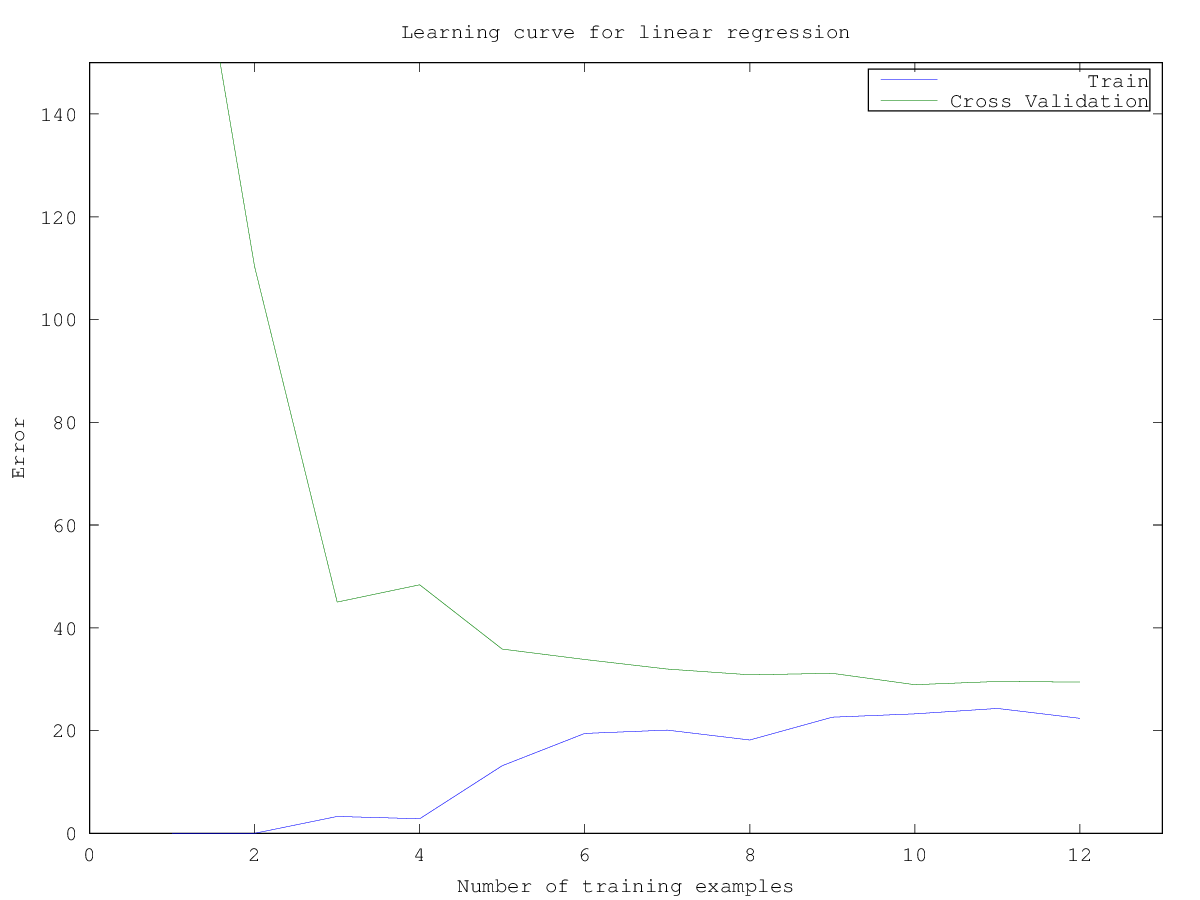

In [8]:
warning ("off", "Octave:divide-by-zero");
%% =========== Part 5: Learning Curve for Linear Regression =============
%  Next, you should implement the learningCurve function. 
%
%  Write Up Note: Since the model is underfitting the data, we expect to
%                 see a graph with "high bias" -- slide 8 in ML-advice.pdf 
%

lambda = 0;
[error_train, error_val] = learningCurve([ones(m, 1) X], y, ...
                  [ones(size(Xval, 1), 1) Xval], yval, ...
                  lambda);

plot(1:m, error_train, 1:m, error_val);
title('Learning curve for linear regression')
legend('Train', 'Cross Validation')
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 150])

fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end


# 3 Polynomial regression

The problem with our linear model was that it was too simple for the data and resulted in underfitting (high bias). In this part of the exercise, you will address this problem by adding more features. For use polynomial regression, our hypothesis has the form:

$$
h_\theta(x) = \theta_0 + \theta_1 * (waterLevel)^1 + \theta_2 * (waterLevel)^2 + \dots + \theta_p * (waterLevel)^p
$$
$$
= \theta_0 + \theta_1x_1 + \theta_2x_2 + \dots + \theta_px_p \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ 
$$

Notice that by defining $x_1 = (waterLevel)$, $x_2 = (waterLevel)^2$ , $\dots$ , $x_p = (waterLevel)^p$, we obtain a linear regression model where the features are the various powers of the original value ($waterLevel$).

Now, you will add more features using the higher powers of the existing feature $x$ in the dataset. Your task in this part is to complete the code in `polyFeatures.m` so that the function maps the original training set `X` of size $mx1$ into its higher powers. Specifically, when a training set `X` of size $mx1$ is passed into the function, the function should return a $m x p$ matrix `X_poly`, where column 1 holds the original values of `X`, column 2 holds the values of `X.^2`, column 3 holds the values of `X.^3`, and so on. Note that you don't have to account for the zero-eth power in this function.

Now you have a function that will map features to a higher dimension, and Part 6 of `ex5.m` will apply it to the training set, the test set, and the cross validation set (which you haven't used yet).

In [9]:
function [X_poly] = polyFeatures(X, p)
    %POLYFEATURES Maps X (1D vector) into the p-th power
    %   [X_poly] = POLYFEATURES(X, p) takes a data matrix X (size m x 1) and
    %   maps each example into its polynomial features where
    %   X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p];
    %
    % You need to return the following variables correctly.
    X_poly = zeros(numel(X), p);

    % ====================== YOUR CODE HERE ======================
    % Instructions: Given a vector X, return a matrix X_poly where the p-th 
    %               column of X contains the values of X to the p-th power.
    %
    % 
    for i=1:p
        X_poly(:,i) = X(:,1).^i;
    end
    % =========================================================================
end

In [10]:
%% =========== Part 6: Feature Mapping for Polynomial Regression =============
%  One solution to this is to use polynomial regression. You should now
%  complete polyFeatures to map each example into its powers
%

function [X_norm, mu, sigma] = featureNormalize(X)
    %FEATURENORMALIZE Normalizes the features in X 
    %   FEATURENORMALIZE(X) returns a normalized version of X where
    %   the mean value of each feature is 0 and the standard deviation
    %   is 1. This is often a good preprocessing step to do when
    %   working with learning algorithms.
    mu = mean(X);
    X_norm = bsxfun(@minus, X, mu);

    sigma = std(X_norm);
    X_norm = bsxfun(@rdivide, X_norm, sigma);
    % ============================================================
end

p = 8;

% Map X onto Polynomial Features and Normalize
X_poly = polyFeatures(X, p);
[X_poly, mu, sigma] = featureNormalize(X_poly);  % Normalize
X_poly = [ones(m, 1), X_poly];                   % Add Ones

% Map X_poly_test and normalize (using mu and sigma)
X_poly_test = polyFeatures(Xtest, p);
X_poly_test = bsxfun(@minus, X_poly_test, mu);
X_poly_test = bsxfun(@rdivide, X_poly_test, sigma);
X_poly_test = [ones(size(X_poly_test, 1), 1), X_poly_test];         % Add Ones

% Map X_poly_val and normalize (using mu and sigma)
X_poly_val = polyFeatures(Xval, p);
X_poly_val = bsxfun(@minus, X_poly_val, mu);
X_poly_val = bsxfun(@rdivide, X_poly_val, sigma);
X_poly_val = [ones(size(X_poly_val, 1), 1), X_poly_val];           % Add Ones

fprintf('Normalized Training Example 1:\n');
fprintf('  %f  \n', X_poly(1, :));

Normalized Training Example 1:
  1.000000  
  -0.362141  
  -0.755087  
  0.182226  
  -0.706190  
  0.306618  
  -0.590878  
  0.344516  
  -0.508481  


## 3.1 Learning Polynomial Regression

After you have completed `polyFeatures.m`, the `ex5.m` script will proceed to train polynomial regression using your linear regression cost function. Keep in mind that even though we have polynomial terms in our feature vector, we are still solving a linear regression optimization problem. The polynomial terms have simply turned into features that we can use for linear regression. We are using the same cost function and gradient that you wrote for the earlier part of this exercise.

For this part of the exercise, you will be using a polynomial of degree 8. It turns out that if we run the training directly on the projected data, will not work well as the features would be badly scaled (e.g., an example with $x = 40$ will now have a feature $x_8 = 40^8 = 6.5 × 10^{12}$). Therefore, you will need to use feature normalization.

Before learning the parameters $\theta$ for the polynomial regression, `ex5.m` will first call `featureNormalize` and normalize the features of the training set, storing the `mu`, `sigma` parameters separately. We have already implemented this function for you and it is the same function from the first exercise. After learning the parameters $\theta$, you should see two plots (Figure 4,5) generated for polynomial regression with $\lambda = 0$.

From Figure 4, you should see that the polynomial fit is able to follow the datapoints very well - thus, obtaining a low training error. However, the polynomial fit is very complex and even drops off at the extremes. This is an indicator that the polynomial regression model is overfitting the training data and will not generalize well.

To better understand the problems with the unregularized ($\lambda$ = 0) model, you can see that the learning curve (Figure 5) shows the same effect where the low training error is low, but the cross validation error is high. There is a gap between the training and cross validation errors, indicating a high variance problem.

One way to combat the overfitting (high-variance) problem is to add regularization to the model. In the next section, you will get to try different $\lambda$ parameters to see how regularization can lead to a better model.

Polynomial Regression (lambda = 0.000000)

# Training Examples	Train Error	Cross Validation Error
  	1		0.000000	160.721900
  	2		0.000000	160.121510
  	3		0.000000	61.754825
  	4		0.000000	61.928895
  	5		0.000000	6.597975
  	6		0.000051	10.476365
  	7		0.026049	10.654568
  	8		0.076369	5.293786
  	9		0.059212	12.809828
  	10		0.124992	7.343872
  	11		0.059034	9.565488
  	12		0.142483	16.299993


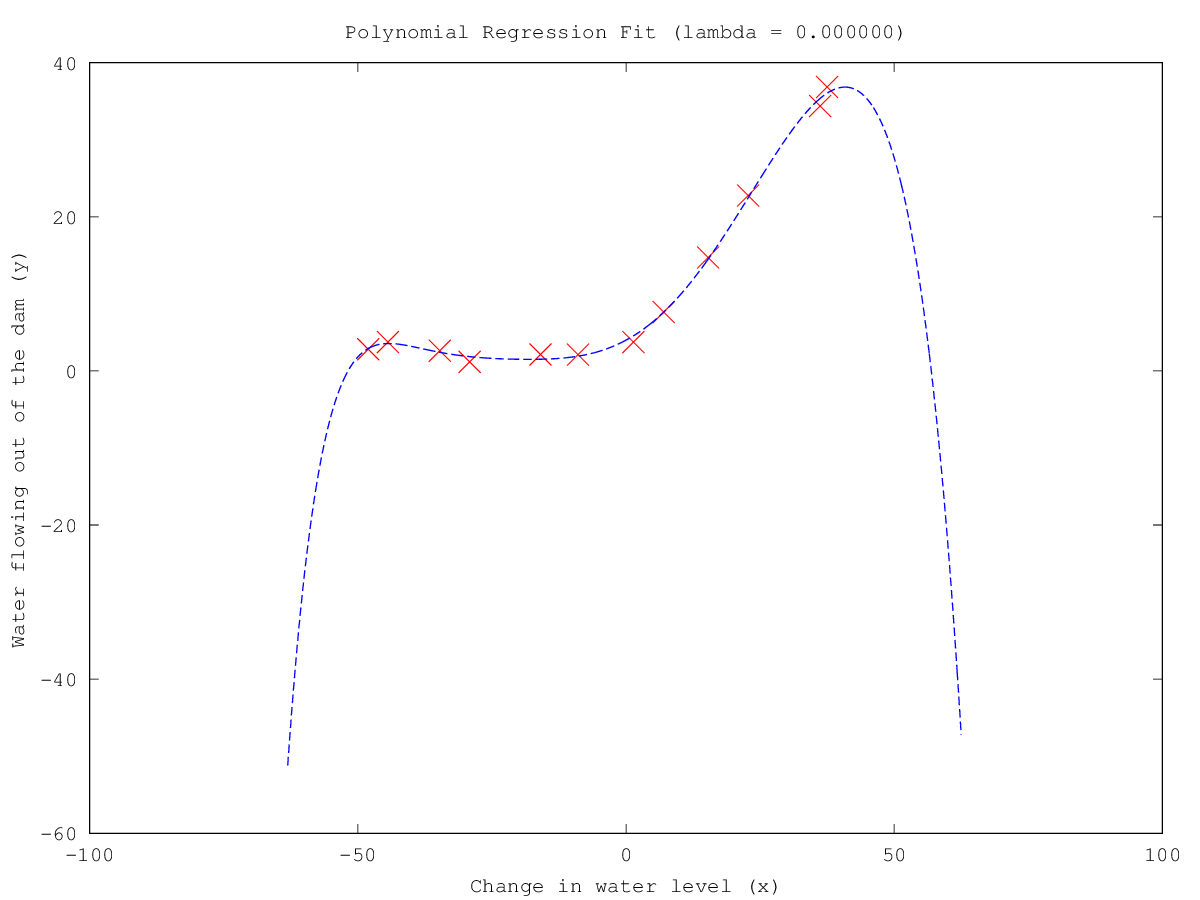

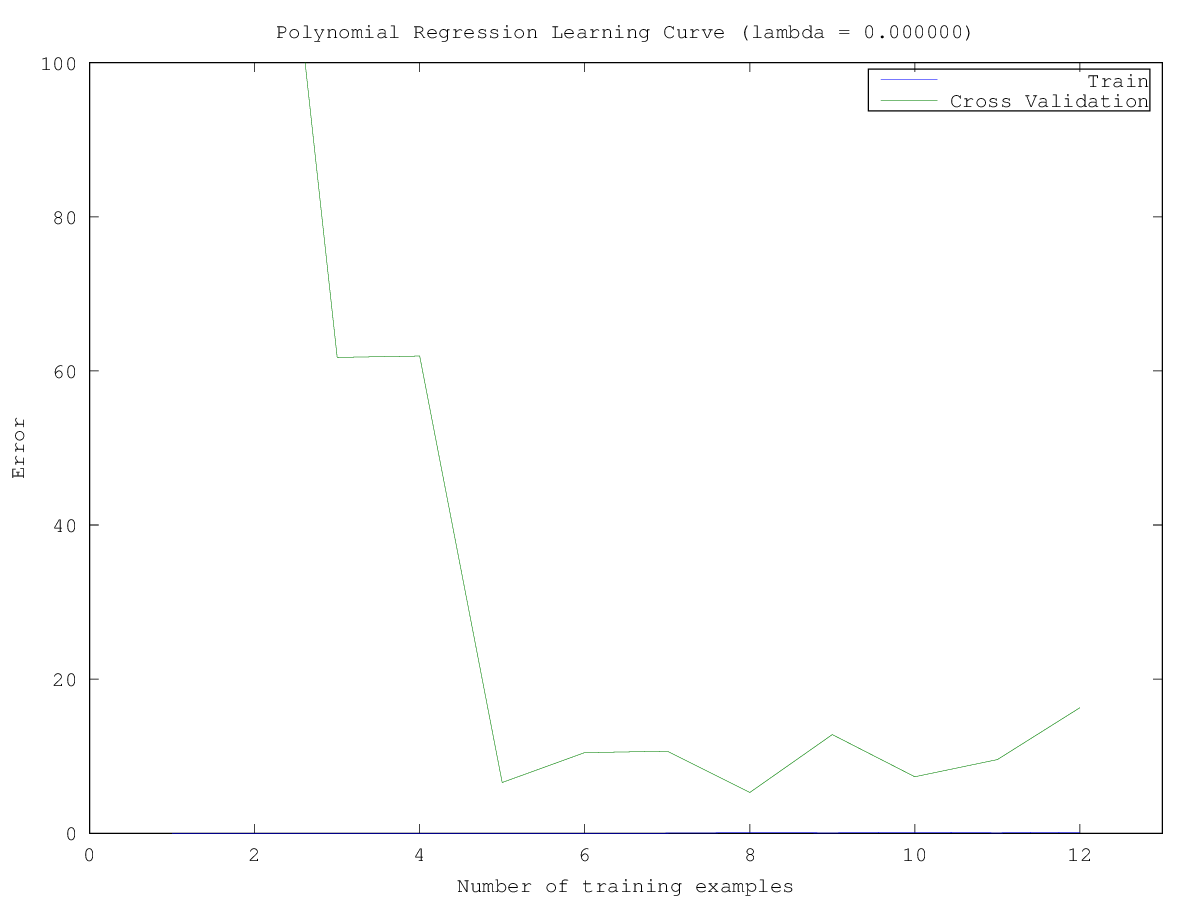

In [11]:
warning ("off", "Octave:divide-by-zero");
%% =========== Part 7: Learning Curve for Polynomial Regression =============
%  Now, you will get to experiment with polynomial regression with multiple
%  values of lambda. The code below runs polynomial regression with 
%  lambda = 0. You should try running the code with different values of
%  lambda to see how the fit and learning curve change.
%

function plotFit(min_x, max_x, mu, sigma, theta, p)
    %PLOTFIT Plots a learned polynomial regression fit over an existing figure.
    %Also works with linear regression.
    %   PLOTFIT(min_x, max_x, mu, sigma, theta, p) plots the learned polynomial
    %   fit with power p and feature normalization (mu, sigma).

    % Hold on to the current figure
    hold on;

    % We plot a range slightly bigger than the min and max values to get
    % an idea of how the fit will vary outside the range of the data points
    x = (min_x - 15: 0.05 : max_x + 25)';

    % Map the X values 
    X_poly = polyFeatures(x, p);
    X_poly = bsxfun(@minus, X_poly, mu);
    X_poly = bsxfun(@rdivide, X_poly, sigma);

    % Add ones
    X_poly = [ones(size(x, 1), 1) X_poly];

    % Plot
    plot(x, X_poly * theta, '--', 'LineWidth', 2)

    % Hold off to the current figure
    hold off
end

lambda = 0;
% Plot different values of lambda
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
for i = 1:m
    fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
end

## 3.2 Optional (ungraded) exercise: Adjusting the regularization parameter

In this section, you will get to observe how the regularization parameter affects the bias-variance of regularized polynomial regression. You should now modify the the lambda parameter in the `ex5.m` and try $\lambda$ = 1, 100. For each of these values, the script should generate a polynomial fit to the data and also a learning curve.

For $\lambda$ = 1, you should see a polynomial fit that follows the data trend well (Figure 6) and a learning curve (Figure 7) showing that both the cross validation and training error converge to a relatively low value. This shows the $\lambda$ = 1 regularized polynomial regression model does not have the high-bias or high-variance problems. In effect, it achieves a good trade-off between bias and variance.

For $\lambda$ = 100, you should see a polynomial fit (Figure 8) that does not follow the data well. In this case, there is too much regularization and the model is unable to fit the training data.

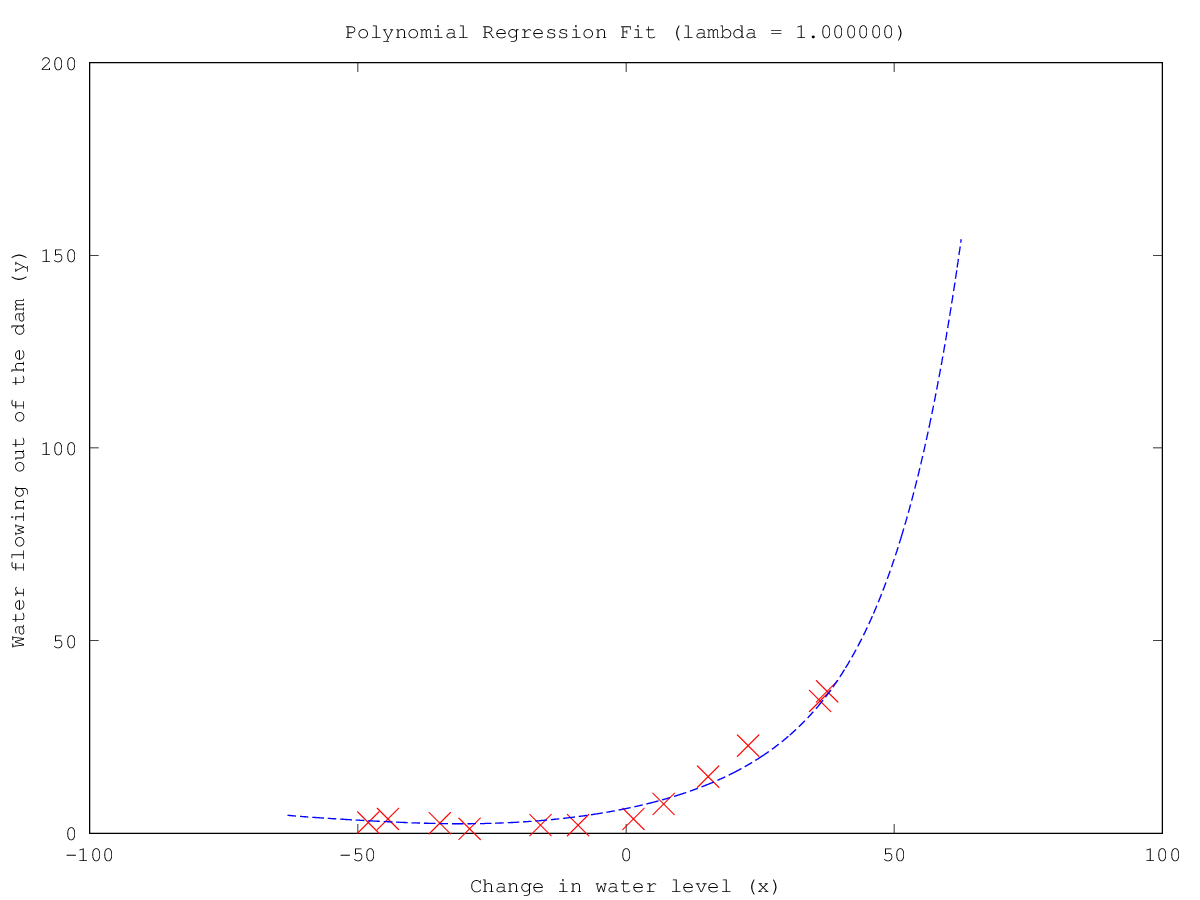

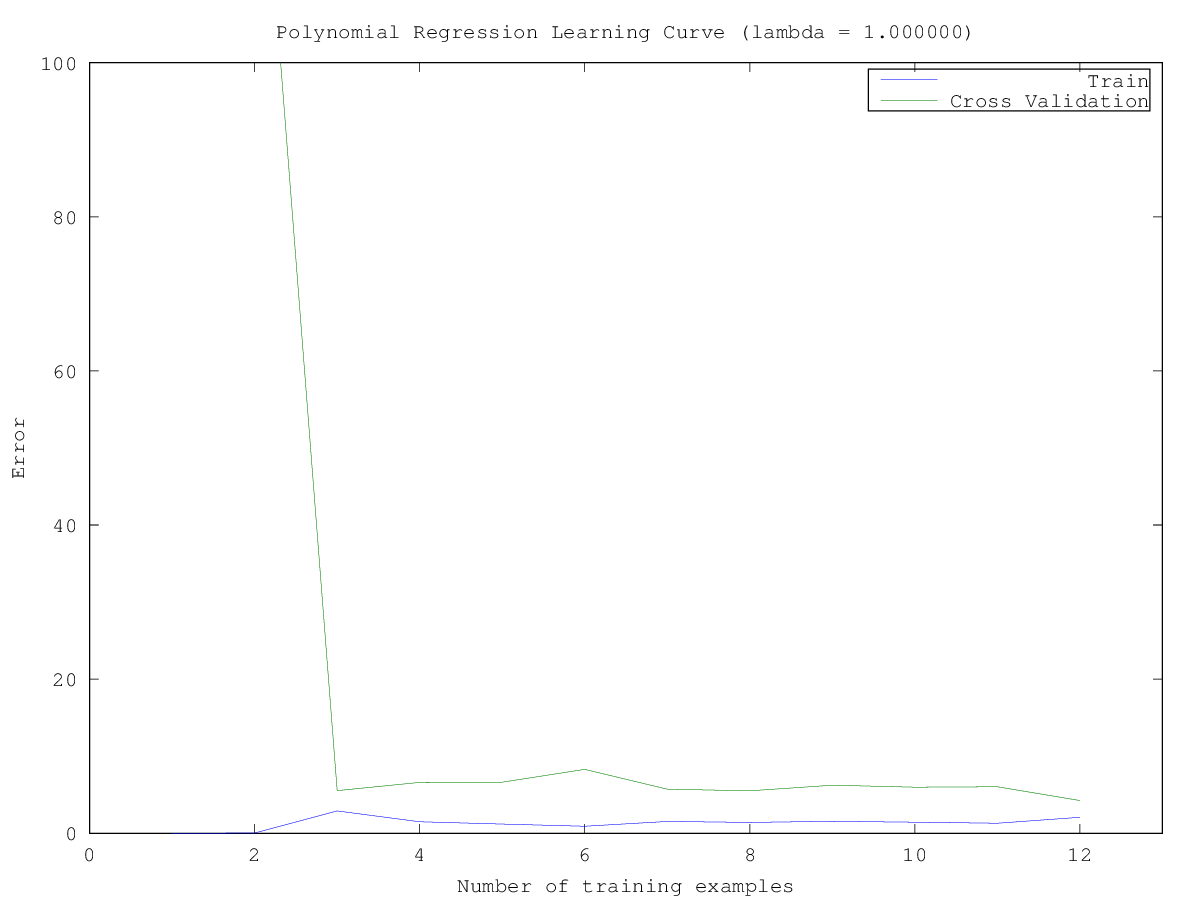

In [12]:
%% PLOT lambda = 1
lambda = 1;
% Plot different values of lambda
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

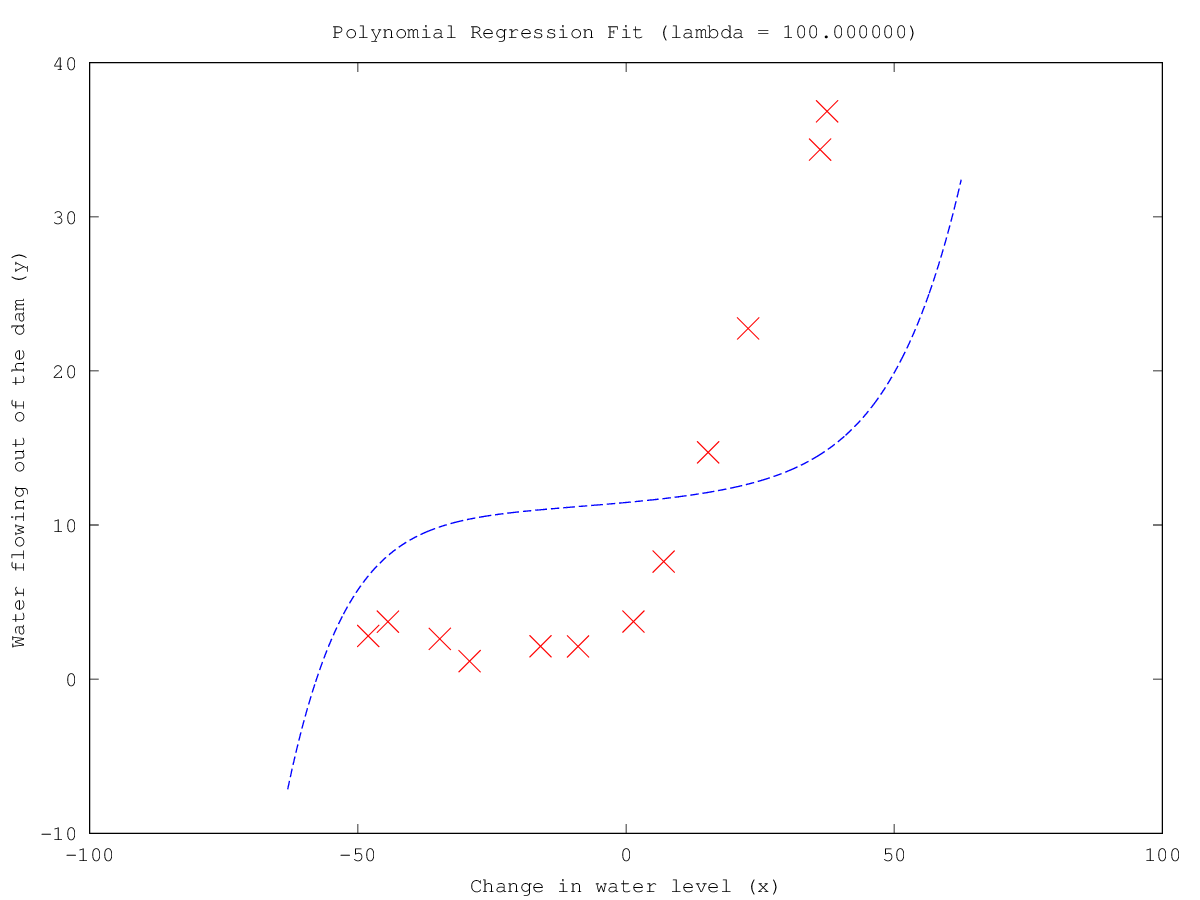

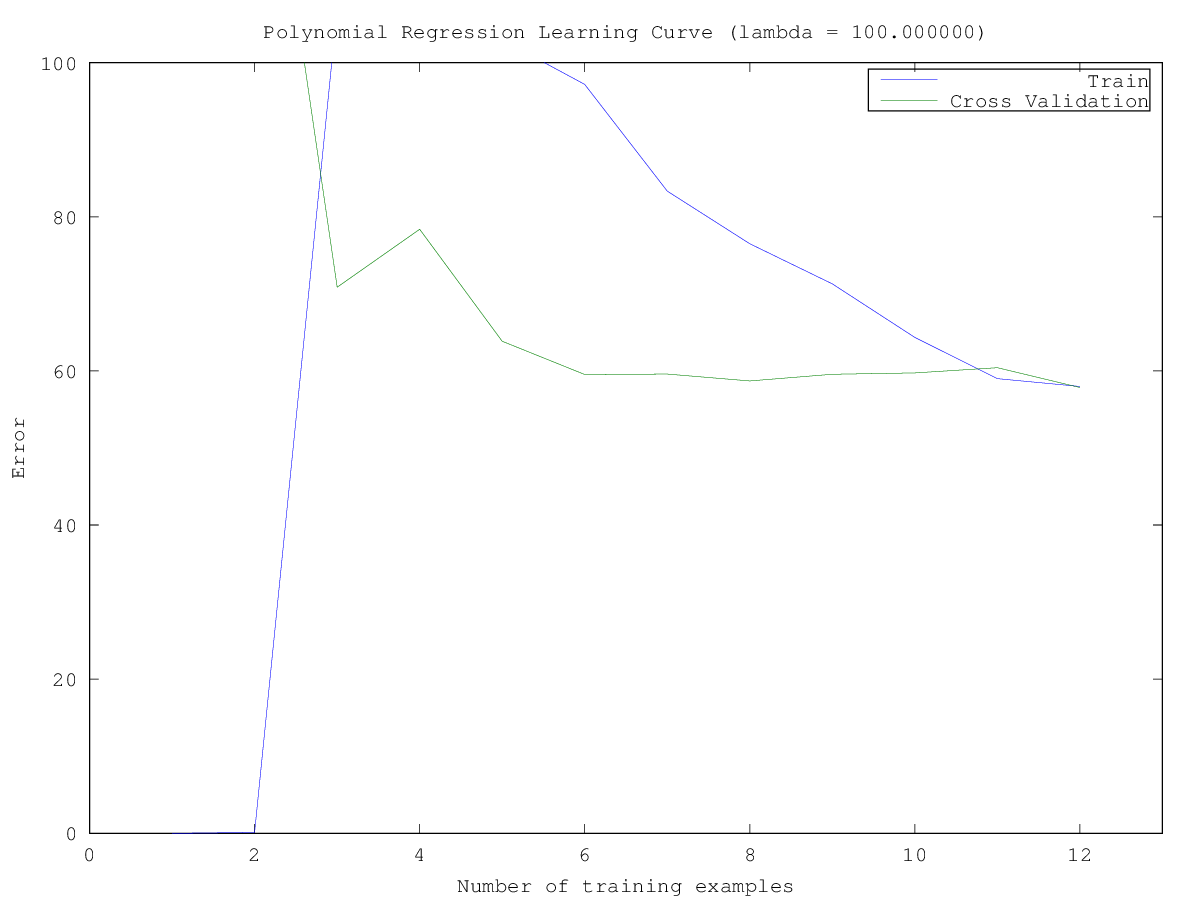

In [13]:
%% PLOT lambda = 100
lambda = 100;
% Plot different values of lambda
[theta] = trainLinearReg(X_poly, y, lambda);

% Plot training data and fit
figure(1);
plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
plotFit(min(X), max(X), mu, sigma, theta, p);
xlabel('Change in water level (x)');
ylabel('Water flowing out of the dam (y)');
title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

figure(2);
[error_train, error_val] = ...
    learningCurve(X_poly, y, X_poly_val, yval, lambda);
plot(1:m, error_train, 1:m, error_val);

title(sprintf('Polynomial Regression Learning Curve (lambda = %f)', lambda));
xlabel('Number of training examples')
ylabel('Error')
axis([0 13 0 100])
legend('Train', 'Cross Validation')

## 3.3 Selecting $\lambda$ using a cross validation set

From the previous parts of the exercise, you observed that the value of $\lambda$ can significantly affect the results of regularized polynomial regression on the training and cross validation set. In particular, a model without regularization ($\lambda$ = 0) fits the training set well, but does not generalize. Conversely, a model with too much regularization ($\lambda$ = 100) does not fit the training set and testing set well. A good choice of $\lambda$ (e.g., $\lambda$ = 1) can provide a good fit to the data.

In this section, you will implement an automated method to select the $\lambda$ parameter. Concretely, you will use a cross validation set to evaluate how good each $\lambda$ value is. After selecting the best $\lambda$ value using the cross validation set, we can then evaluate the model on the test set to estimate how well the model will perform on actual unseen data.

Your task is to complete the code in `validationCurve.m`. Specifically, you should should use the `trainLinearReg` function to train the model using different values of $\lambda$ and compute the training error and cross validation error. You should try $\lambda$ in the following range: $\{0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10\}$.

After you have completed the code, the next part of `ex5.m` will run your function can plot a cross validation curve of error v.s. $\lambda$ that allows you select which $\lambda$ parameter to use. You should see a plot similar to Figure 9. In this figure, we can see that the best value of $\lambda$ is around 3. Due to randomness
in the training and validation splits of the dataset, the cross validation error can sometimes be lower than the training error.

In [14]:
function [lambda_vec, error_train, error_val] = validationCurve(X, y, Xval, yval)
    %VALIDATIONCURVE Generate the train and validation errors needed to
    %plot a validation curve that we can use to select lambda
    %   [lambda_vec, error_train, error_val] = ...
    %       VALIDATIONCURVE(X, y, Xval, yval) returns the train
    %       and validation errors (in error_train, error_val)
    %       for different values of lambda. You are given the training set (X,
    %       y) and validation set (Xval, yval).
    %

    % Selected values of lambda (you should not change this)
    lambda_vec = [0 0.001 0.003 0.01 0.03 0.1 0.3 1 3 10]';

    % You need to return these variables correctly.
    error_train = zeros(length(lambda_vec), 1);
    error_val = zeros(length(lambda_vec), 1);

    % ====================== YOUR CODE HERE ======================
    % Instructions: Fill in this function to return training errors in 
    %               error_train and the validation errors in error_val. The 
    %               vector lambda_vec contains the different lambda parameters 
    %               to use for each calculation of the errors, i.e, 
    %               error_train(i), and error_val(i) should give 
    %               you the errors obtained after training with 
    %               lambda = lambda_vec(i)
    %
    % Note: You can loop over lambda_vec with the following:
    %
    %       for i = 1:length(lambda_vec)
    %           lambda = lambda_vec(i);
    %           % Compute train / val errors when training linear 
    %           % regression with regularization parameter lambda
    %           % You should store the result in error_train(i)
    %           % and error_val(i)
    %           ....
    %           
    %       end
    %
    %
    for i=1:length(lambda_vec)
        lambda = lambda_vec(i);
        [theta] = trainLinearReg(X, y, lambda);
        [Jtrain, _] = linearRegCostFunction(X, y, theta, 0);
        error_train(i) = Jtrain;
        [Jval, _] = linearRegCostFunction(Xval, yval, theta, 0);
        error_val(i) = Jval;
    end
    % =========================================================================
end

lambda		Train Error	Validation Error
 0.000000	0.142483	16.299993
 0.001000	0.184326	21.437433
 0.003000	0.195051	19.995768
 0.010000	0.222353	17.072727
 0.030000	0.281863	12.830924
 0.100000	0.459318	7.587013
 0.300000	0.921760	4.636833
 1.000000	2.076188	4.260625
 3.000000	4.901351	3.822907
 10.000000	16.092213	9.945508


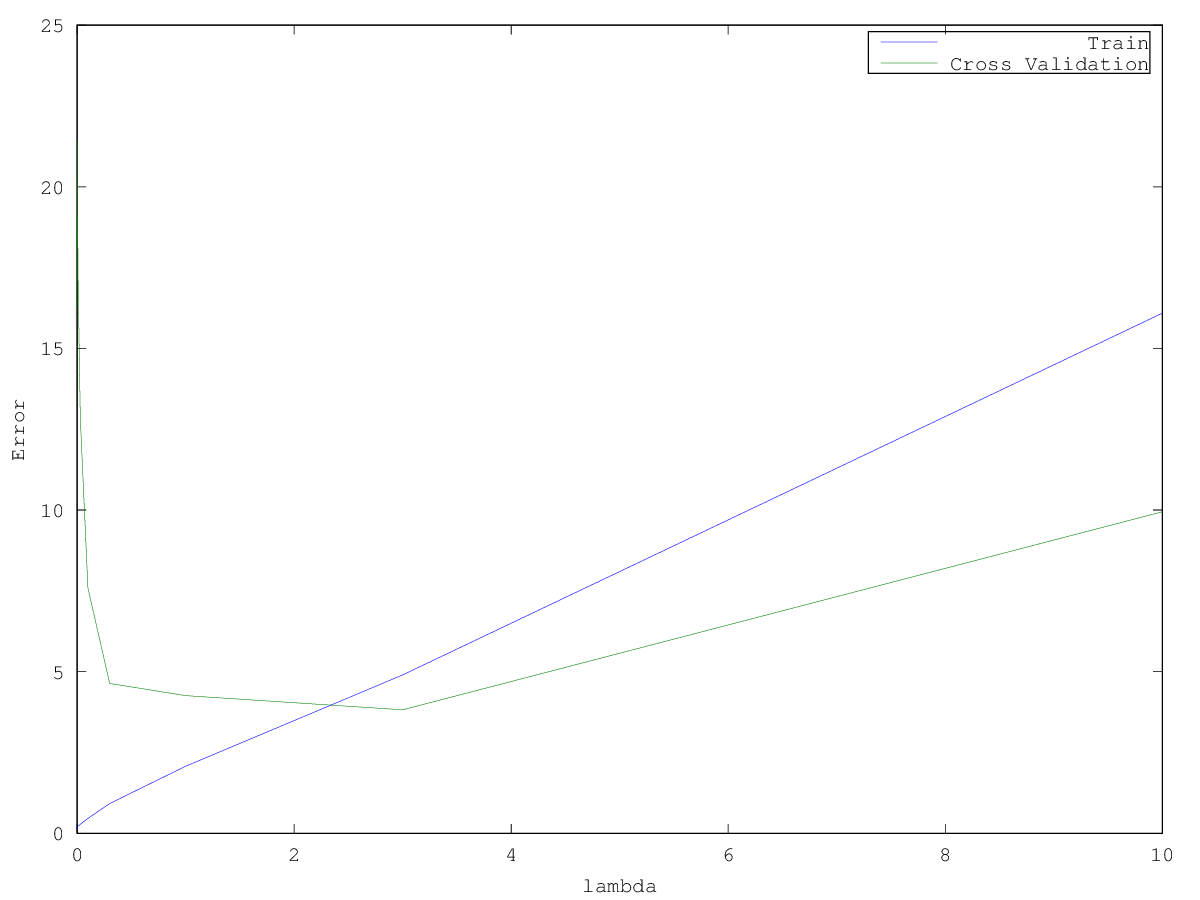

In [15]:
%% =========== Part 8: Validation for Selecting Lambda =============
%  You will now implement validationCurve to test various values of 
%  lambda on a validation set. You will then use this to select the
%  "best" lambda value.
%

[lambda_vec, error_train, error_val] = ...
    validationCurve(X_poly, y, X_poly_val, yval);

close all;
plot(lambda_vec, error_train, lambda_vec, error_val);
legend('Train', 'Cross Validation');
xlabel('lambda');
ylabel('Error');

fprintf('lambda\t\tTrain Error\tValidation Error\n');
for i = 1:length(lambda_vec)
    fprintf(' %f\t%f\t%f\n', ...
            lambda_vec(i), error_train(i), error_val(i));
end

## 3.4 Optional (ungraded) exercise: Computing test set error

In the previous part of the exercise, you implemented code to compute the cross validation error for various values of the regularization parameter $\lambda$. However, to get a better indication of the model's performance in the real world, it is important to evaluate the "final" model on a test set that was not used in any part of training (that is, it was neither used to select the $\lambda$ parameters, nor to learn the model parameters $\theta$).

For this optional (ungraded) exercise, you should compute the test error using the best value of $\lambda$ you found. In our cross validation, we obtained a test error of 3.8599 for $\lambda$ = 3.

In [20]:
bestLambda = 3;
fprintf('Applying chosen lambda (%d) to training set.\n', bestLambda);
[theta] = trainLinearReg(X_poly, y, bestLambda);
[Jtest, gradtest] = linearRegCostFunction(X_poly_test, ytest, theta, 0);
fprintf('Test error: %f ', Jtest);
fprintf('(should be close to 3.8599).\n');

Applying chosen lambda (3) to training set.
Test error: 3.859888 
(should be close to 3.8599).


## 3.5 Optional (ungraded) exercise: Plotting learning curves with randomly selected examples 

In practice, especially for small training sets, when you plot learning curves to debug your algorithms, it is often helpful to average across multiple sets of randomly selected examples to determine the training error and cross validation error.

Concretely, to determine the training error and cross validation error for $i$ examples, you should first randomly select $i$ examples from the training set and $i$ examples from the cross validation set. You will then learn the parameters $\theta$ using the randomly chosen training set and evaluate the parameters $\theta$ on the randomly chosen training set and cross validation set. The above steps should then be repeated multiple times (say 50) and the averaged error should be used to determine the training error and cross validation error for $i$ examples.

For this optional (ungraded) exercise, you should implement the above strategy for computing the learning curves. For reference, figure 10 shows the learning curve we obtained for polynomial regression with $\lambda$ = 0.01. Your figure may differ slightly due to the random selection of examples.

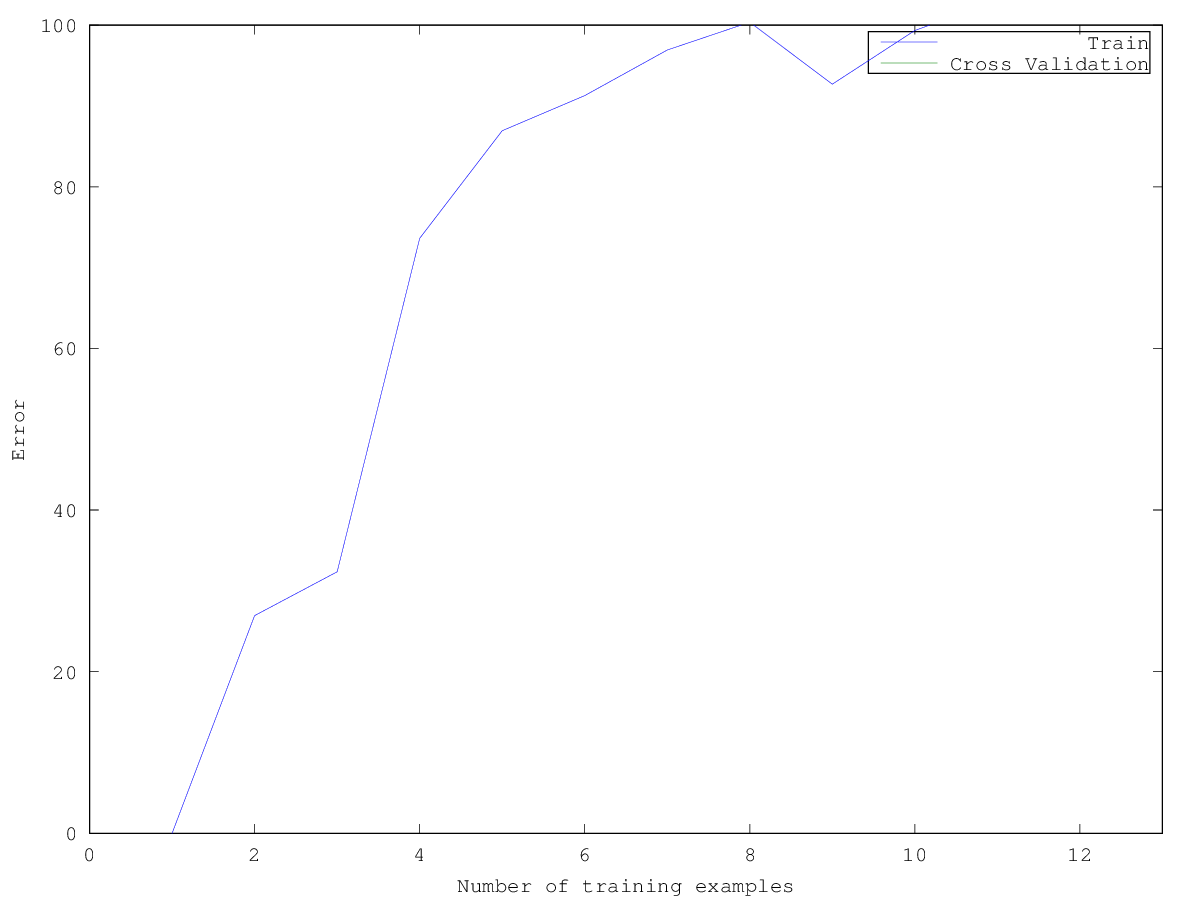

In [18]:
function errorOverRandomExamples(X, y, Xval, yval)
    % Randomly separates training and validation sets multiple times and generate the
    % error for each iteration. The final errors are computed as the mean of the generated
    % errors.

    m = size(X, 1);
    error_train = zeros(m,1);
    error_val =  zeros(m,1);
    lambda = 0.01;
    loops = 20;

    for l=1:loops
        % i = number of training examples
        for i=1:m
            % randomly select i rows
            sel = randperm(size(X, 1));
            sel = sel(1:i);

            % create a matrix consisting only of the randomly selected rows from X and y
            X_sel = X(sel,:);
            y_sel = y(sel,:);

            % learn parameter theta using the randomly chose training set
            theta = trainLinearReg(X_sel, y_sel, lambda);
            % evaluate the parameters theta
            [J, grad] = linearRegCostFunction(X_sel, y_sel, theta, 0);
            % accumulate errors for i-training examples
            error_train(i) = error_train(i) + J;

            % ---
            % cross validation set
            % ---
            % (:1b:) ... and i examples from the cross validation set
            sel = randperm(size(Xval, 1));
            sel = sel(1:i);
            X_sel = Xval(sel,:);
            y_sel = yval(sel,:);
            % (:3b:) ... and cross validation set
            [J, grad_val] = linearRegCostFunction(X_sel, y_sel, theta, 0);

            error_val(i) = error_val(i) + J;

        end
    end

    % finding the average
    error_train = error_train ./ loops;
    error_val = error_val ./ loops;

    % least but not last, do some plotting to visualise our results
    plot(1:m, error_train, 1:m, error_val);
    xlabel('Number of training examples');
    ylabel('Error');
    axis([0 13 0 100]);
    legend('Train', 'Cross Validation');
end

errorOverRandomExamples(X, y, Xval, yval)

In [ ]:
warning ("off", "Octave:divide-by-zero");
function errorOverRandomExamples(X_poly, y, X_poly_val, yval, X, mu, sigma, p)
    % Randomly separates training and validation sets multiple times and generate the
    % error for each iteration. The final errors are computed as the mean of the generated
    % errors.

    lambda = 0.01;
    rand_iter = 50;

    Xy_poly      = [X_poly y];
    Xy_poly_val  = [X_poly_val yval];
    m_poly       = size (Xy_poly, 1);  % /2

    error_train_rand = zeros(3, m_poly); % every row is a vector containing the errors for each training set size
    error_val_rand   = zeros(3, m_poly);

    for i = 1:rand_iter
      % get 12 random training set examples
      Xy_poly_rand    = Xy_poly(randperm (size (Xy_poly, 1)), :)(1:m_poly, :);
      X_poly_rand     = Xy_poly_rand(:, 1:(size(Xy_poly_rand, 2) - 1));
      y_rand          = Xy_poly_rand(:, size(Xy_poly_rand, 2));

      % get 12 random cross validation examples
      Xy_poly_val_rand = Xy_poly_val(randperm (size (Xy_poly_val, 1)), :)(1:size (Xy_poly_val, 1), :);
      X_poly_val_rand  = Xy_poly_val_rand(:, 1:(size(Xy_poly_val_rand, 2) - 1));
      yval_rand        = Xy_poly_val_rand(:, size(Xy_poly_val_rand, 2));

      [theta] = trainLinearReg(X_poly_rand, y_rand, lambda);

      [et, ev] = learningCurve(X_poly_rand, y_rand, X_poly_val_rand, yval_rand, lambda);
      error_train_rand(i, :) = et';
      error_val_rand(i, :)   = ev';
    end

    error_train = mean(error_train_rand, 1)';
    error_val   = mean(error_val_rand, 1)';


    % Plot training data and fit
    figure(1);
    plot(X, y, 'rx', 'MarkerSize', 10, 'LineWidth', 1.5);
    plotFit(min(X), max(X), mu, sigma, theta, p);
    xlabel('Change in water level (x)');
    ylabel('Water flowing out of the dam (y)');
    title (sprintf('Polynomial Regression Fit (lambda = %f)', lambda));

    figure(2);
    plot(1:m_poly, error_train, 1:m_poly, error_val);

    title(sprintf('Polynomial Regression Learning Curve (lambda = %f, rand_iter= %f', lambda, rand_iter));
    xlabel('Number of training examples')
    ylabel('Error')
    axis([0 13 0 100])
    legend('Train', 'Cross Validation')

    fprintf('Polynomial Regression (lambda = %f)\n\n', lambda);
    fprintf('# Training Examples\tTrain Error\tCross Validation Error\n');
    for i = 1:m_poly
        fprintf('  \t%d\t\t%f\t%f\n', i, error_train(i), error_val(i));
    end
end

errorOverRandomExamples(X_poly, y, X_poly_val, yval, X, mu, sigma, p)

^C
